In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data is taken from Kaggle with the below Link
https://www.kaggle.com/datasets/fredericksalazar/pib-gdp-global-by-countries-since-1960-to-2021

In [13]:
# Data ingestion
Country = pd.read_excel(r"C:\Users\Jalaluddin Shaik\Downloads\countries_gdp_hist.xlsx")

# Data Preparation : required Columns, GDP in 10 millions
Country = Country[['country_name','year','total_gdp']]
Country['total_gdp'] = Country['total_gdp']/(10**6)

unique_Country = Country['country_name'].unique()

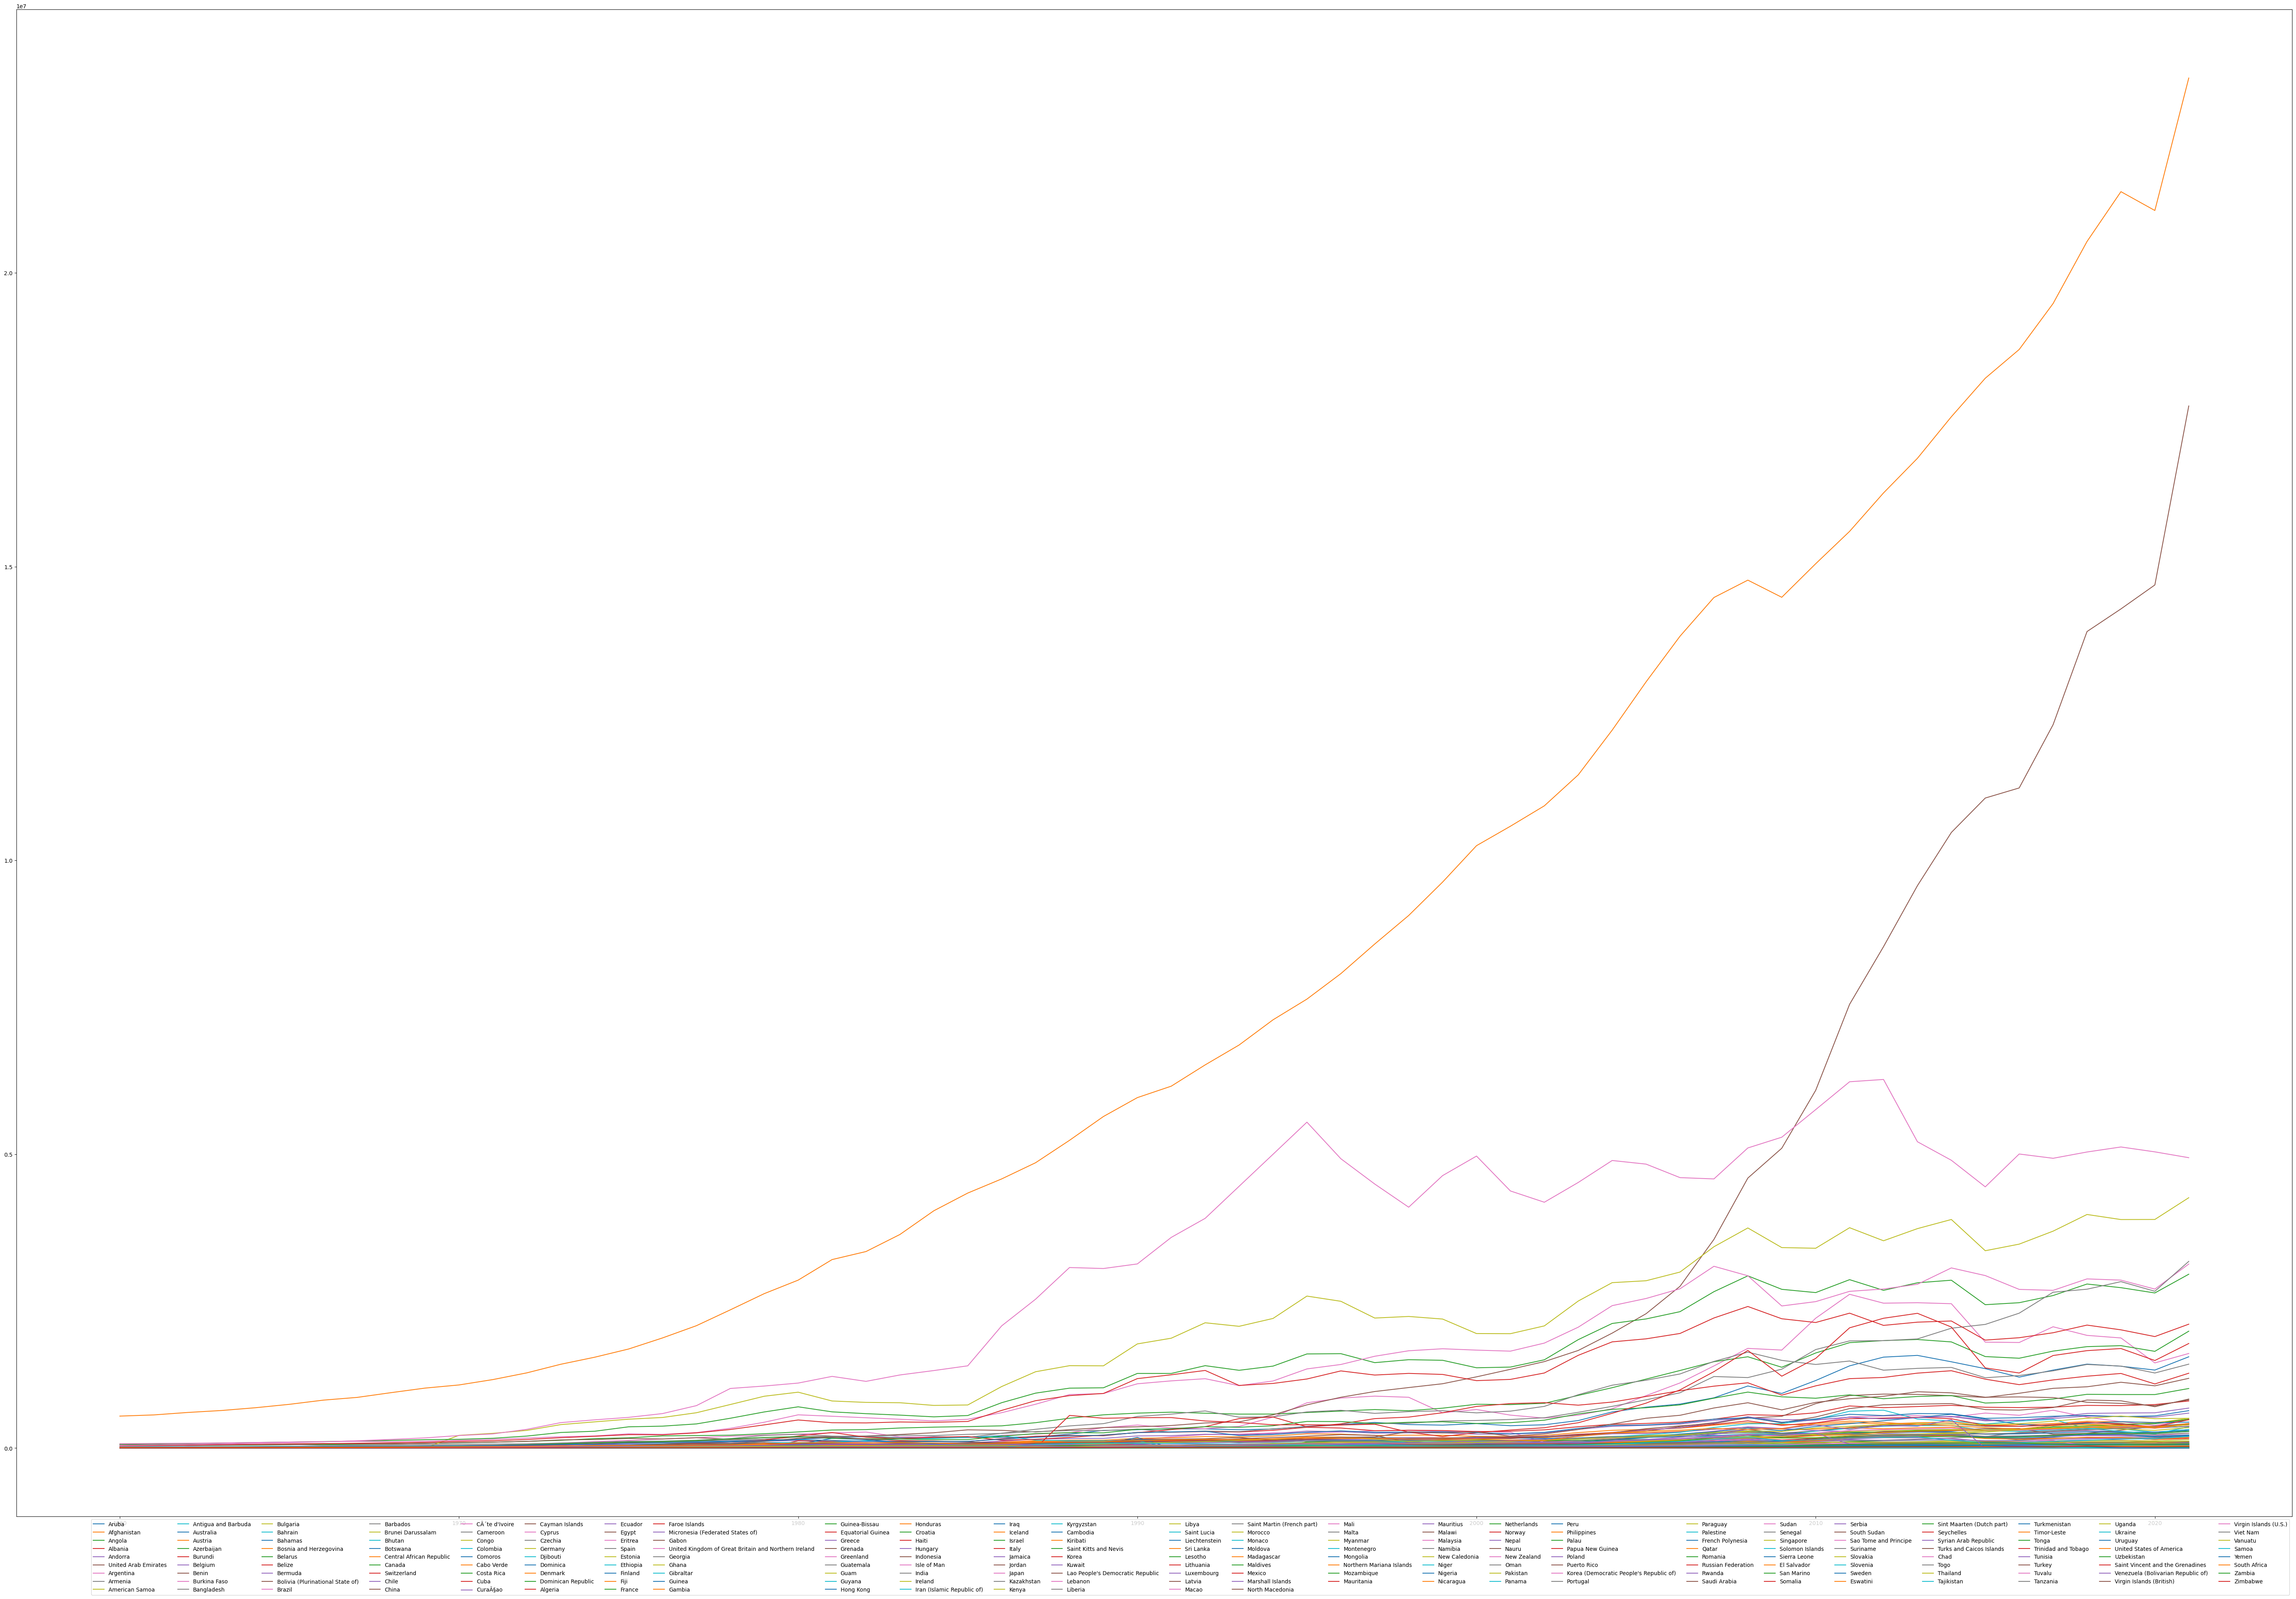

In [6]:
fig, ax1 = plt.subplots(figsize=(75,50))
for i in range(len(unique_Country)):
    Country_i = Country[Country['country_name'] == unique_Country[i]]
    ax1.plot(Country_i['year'],Country_i['total_gdp'], label = unique_Country[i])
    plt.legend(bbox_to_anchor =(1,0),ncol=25)
    plt.plot()

In [14]:
Country_after_2000 = Country[Country['year']>1999]

In [15]:
After_2000 = pd.DataFrame()
for i in unique_Country:
    Country_i = Country_after_2000[Country_after_2000['country_name']==i].sort_values('year')
    Country_i['Lag'] = Country_after_2000['total_gdp'].shift(1)
    After_2000 = After_2000.append(Country_i)

C:\Users\Jalaluddin Shaik\AppData\Local\Temp\ipykernel_7984\3606299043.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  After_2000 = After_2000.append(Country_i)
C:\Users\Jalaluddin Shaik\AppData\Local\Temp\ipykernel_7984\3606299043.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  After_2000 = After_2000.append(Country_i)
C:\Users\Jalaluddin Shaik\AppData\Local\Temp\ipykernel_7984\3606299043.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  After_2000 = After_2000.append(Country_i)
C:\Users\Jalaluddin Shaik\AppData\Local\Temp\ipykernel_7984\3606299043.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  After_2000 = After_2000.ap

C:\Users\Jalaluddin Shaik\AppData\Local\Temp\ipykernel_7984\3606299043.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  After_2000 = After_2000.append(Country_i)
C:\Users\Jalaluddin Shaik\AppData\Local\Temp\ipykernel_7984\3606299043.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  After_2000 = After_2000.append(Country_i)
C:\Users\Jalaluddin Shaik\AppData\Local\Temp\ipykernel_7984\3606299043.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  After_2000 = After_2000.append(Country_i)
C:\Users\Jalaluddin Shaik\AppData\Local\Temp\ipykernel_7984\3606299043.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  After_2000 = After_2000.ap

C:\Users\Jalaluddin Shaik\AppData\Local\Temp\ipykernel_7984\3606299043.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  After_2000 = After_2000.append(Country_i)
C:\Users\Jalaluddin Shaik\AppData\Local\Temp\ipykernel_7984\3606299043.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  After_2000 = After_2000.append(Country_i)
C:\Users\Jalaluddin Shaik\AppData\Local\Temp\ipykernel_7984\3606299043.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  After_2000 = After_2000.append(Country_i)
C:\Users\Jalaluddin Shaik\AppData\Local\Temp\ipykernel_7984\3606299043.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  After_2000 = After_2000.ap

In [16]:
After_2000['Percentage increase'] = (After_2000['total_gdp'] - After_2000['Lag'])*100/After_2000['total_gdp']

In [17]:
Final_After_2000 = After_2000[After_2000['Percentage increase']!=(-1)*np.inf].dropna()
temp = Final_After_2000.groupby('country_name').agg({'Percentage increase':'mean','total_gdp':'sum'}).reset_index()
Country_Name = temp.sort_values('total_gdp').tail(10)['country_name'].unique()

In [18]:
Final_After_2000['year'] = pd.to_datetime(Final_After_2000.year,format = '%Y')

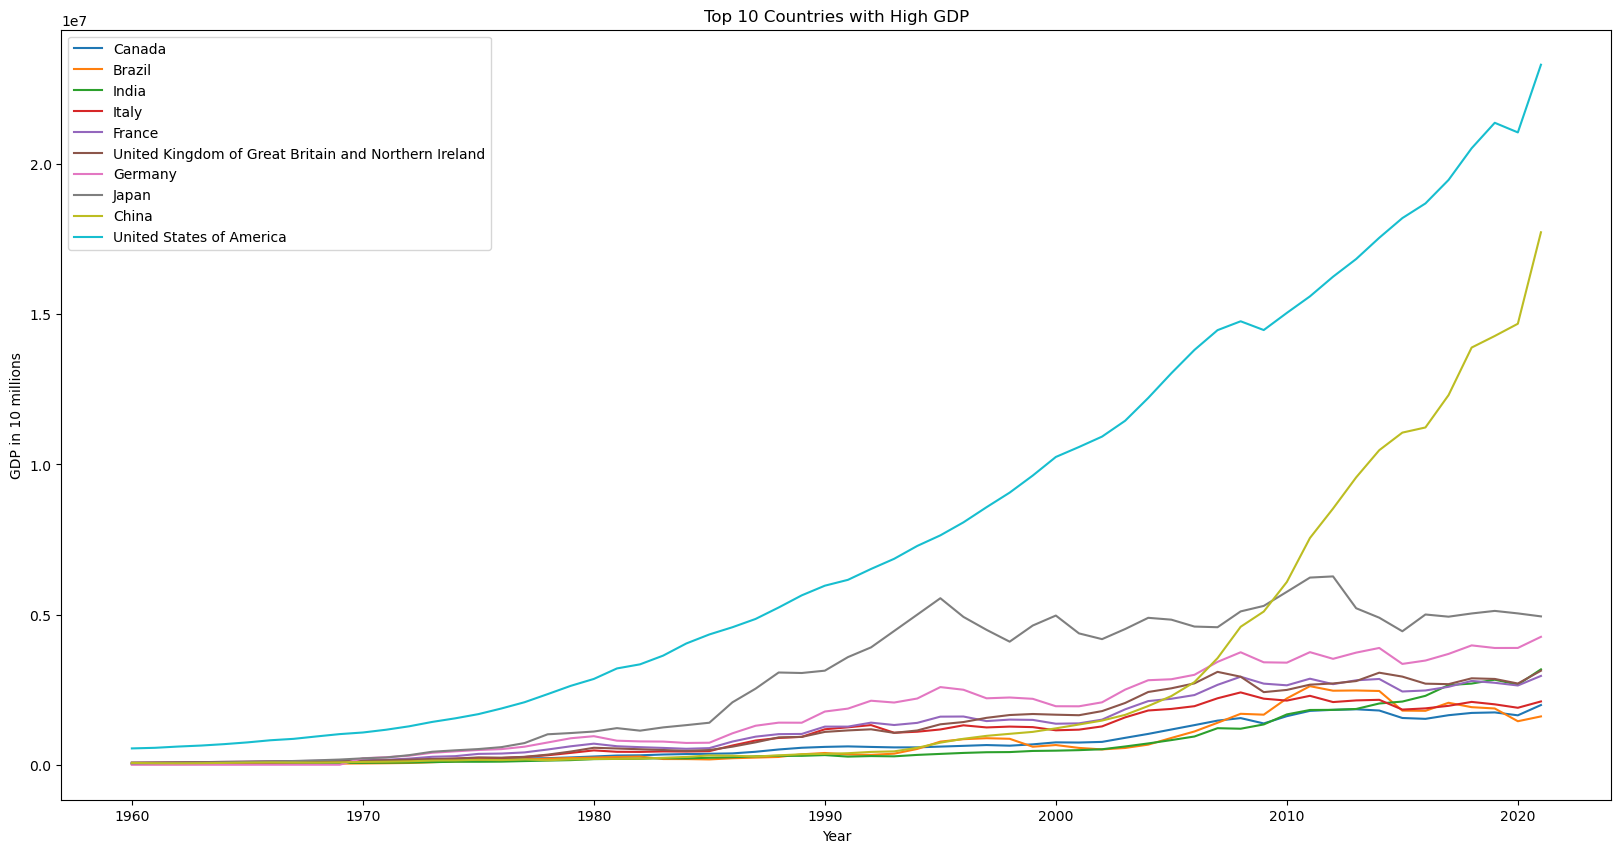

In [19]:
fig, ax1 = plt.subplots(figsize=(20,10))
for i in range(len(Country_Name)):
    Country_i = Country[Country['country_name'] == Country_Name[i]]
    ax1.plot(Country_i['year'],Country_i['total_gdp'], label = Country_Name[i])
    plt.xlabel('Year')
    plt.ylabel('GDP in 10 millions')
    plt.title('Top 10 Countries with High GDP')
#     plt.ylim((0, 10))
    plt.legend()
    plt.plot()

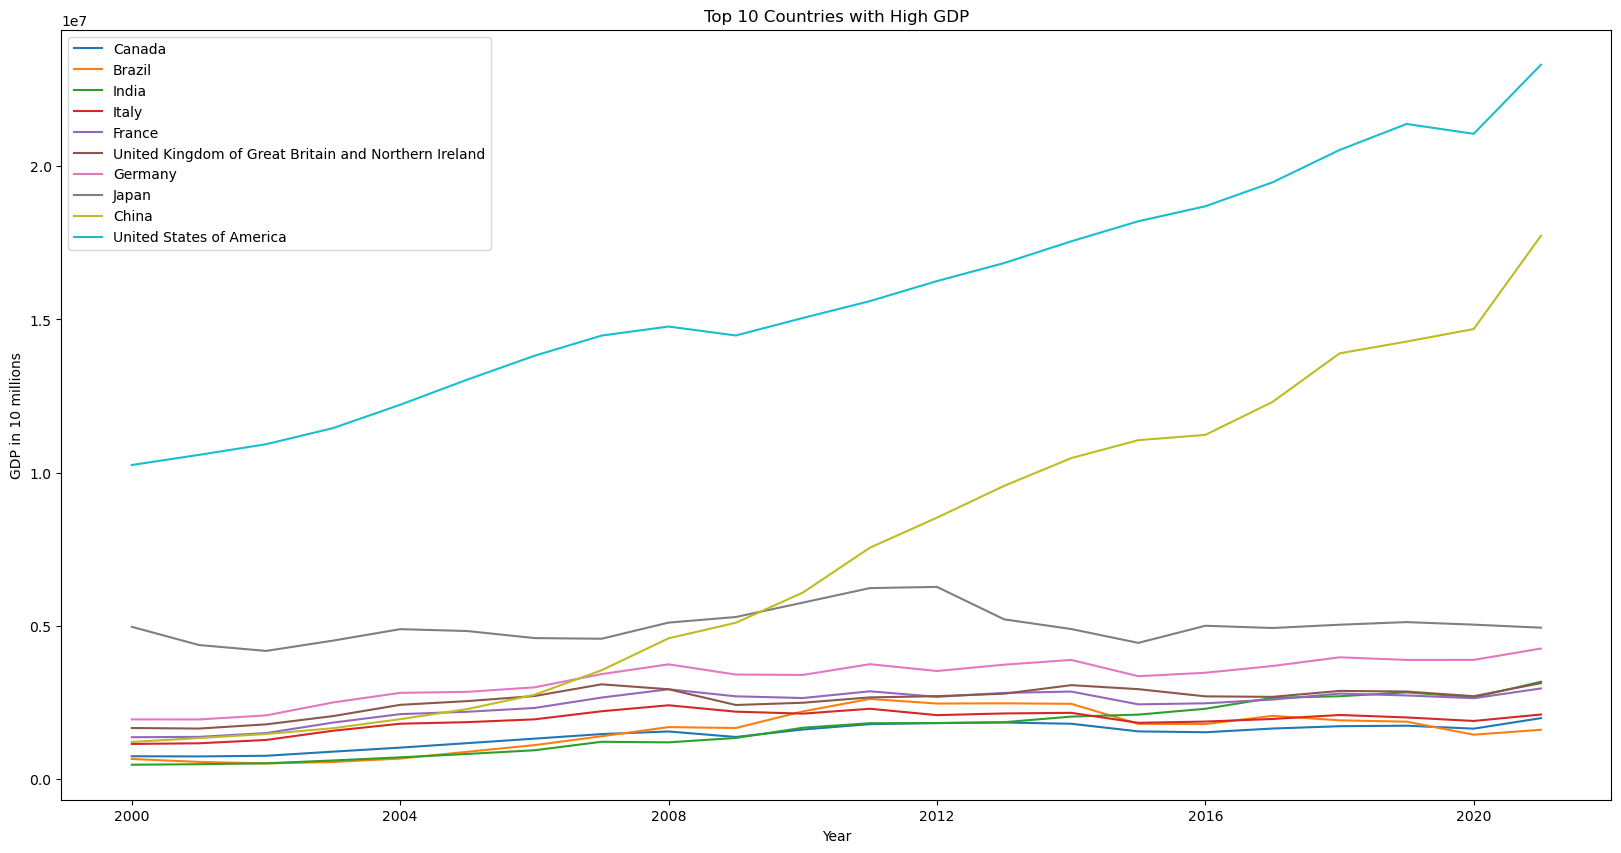

In [20]:
fig, ax1 = plt.subplots(figsize=(20,10))
for i in range(len(Country_Name)):
    Country_i = Final_After_2000[Final_After_2000['country_name'] == Country_Name[i]]
    ax1.plot(Country_i['year'],Country_i['total_gdp'], label = Country_Name[i])
    plt.xlabel('Year')
    plt.ylabel('GDP in 10 millions')
    plt.title('Top 10 Countries with High GDP')
#     plt.ylim((0, 23315080560000))
    plt.legend()
    plt.plot()